In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
#Se definen algunos parámetricos cosmológicos estándares
neff0=3.04 # número efectivo de especies relativista
h=.6736 #H0/100 km/s/Mpc
om_bar0=0.051 #parámetro de densidad bariónico a z=0
om_dm0=0.264 #parámetro de densidad de materia oscura a z=0
om_lam0=0.68 #parámetro de densidad de constante cosmológica a z=0
om_rad0=9.237e-05 #parámetro de densidad de radiación a z=0

print(om_bar0+om_dm0)
c=299792 #km/s #velocidad de la luz
kmtoMpc=3.2408e-20 #factor de conversión de km a Mpc
H0=h*100
H0s=(H0)*kmtoMpc
c_over_H0=c*kmtoMpc/H0s #c/H0
c_over_H0

0.315


4450.593824228029

Modelos cosmologicos

Cambiar $\Omega_{r0}=2.469 \times 10^{-5}h^{-2} (1+0.2271N_{eff})$, donde $N_{eff}=3.04$ es el número de especies relativistas

In [3]:
def omr(h):
    return 2.469e-5*pow(h,-2.0)*(1.0+0.2271*neff0)

In [17]:
# Se define la clase para la Cosmología estándar LCDM
class CosmologiaLCDM:
    def __init__(self,h=.6736,odm0=0.264, ob0=0.051):
        #Aquí se definen los parámetros del modelo cosmológicos como propiedades de la clase
        self.h= h
        self.Omega_dm0 = odm0 
        self.Omega_rad0 = omr(h)
        self.Omega_bar0 = ob0    
    
    #Atributos de la clase
    def Ezmodel(self, z=0):
        #This function returns the dimensionless Friedmann equation E(z)=H(z)/H0 for LCDM
        z1=1.0+z
        
        z13=np.power(z1,3.)
        
        z14=np.power(z1,4.)
        
        OMAT=(self.Omega_dm0+self.Omega_bar0)*z13 #Matter density (dark+baryionic) parameter as function of z
        
        ORAD=self.Omega_rad0*z14 #radiation density parameter as function of z
        
        ODE=1.0- self.Omega_dm0 - self.Omega_bar0-self.Omega_rad0 #Flatness condition
        
        x=np.sqrt(OMAT +ORAD + ODE)
        
        return x
    
    def fmodel(self,z=0):
        #This function returns the inverse of the  dimensionless Friedmann equation
        return 1.0/self.Ezmodel(z)
    
    def Dc(self,z=0):
        #This function returns the transverse comoving distance for a flat Universe
        return c_over_H0*quad(lambda x:self.fmodel(x),0,z)[0]

    def DA(self,z=0):
        #This function returns the angular diameter distance to any source at redshift z
        return (1/(1+z))*self.Dc(z)

    def DA12(self,z1=0.5,z2=2):
        #"This function returns the angular diameter distance between two objects"
        return (c_over_H0/(1+z2))*quad(lambda x:self.fmodel(x),z1,z2)[0]

    def DL(self,z=0):
         #"This function returns the luminosity distance at redshift z"
        return (1+z)*self.Dc(z)


In [42]:
cos1=CosmologiaLCDM() #En esta línea se define una variable cos1 con la Cosmología LCDM
Dc1=cos1.Dc(1) # Aquí acceso al atributo distancia comóvil y evaluo a z=1
print(Dc1)

3402.9504029176687


In [6]:
cos1.h

0.6736

In [16]:
coslc2=CosmologiaLCDM(h=0.8)
coslc2.h
coslc2.Omega_dm0
coslc2.Ezmodel(0)

1.0

In [32]:
# se define la clase para la Cosmología Cardassiana
class CosmologiaCardassian:
    def __init__(self,h=.6736,odm0=0.264, ob0=0.051, nfid=-0.2):
        self.h= h
        self.Omega_dm0 = odm0 
        self.Omega_rad0 = omr(h)
        self.Omega_bar0 = ob0 
        self.n=nfid
    
        
    def Ezmodel(self, z):
        
        z1=1.0+z
        
        z13=np.power(z1,3.)
        
        z14=np.power(z1,4.)
        
        OMAT0=(self.Omega_dm0+self.Omega_bar0) #Matter density (dark+baryionic) parameter at z=0
        
        OMAT=OMAT0*z13 #Matter density (dark+baryionic) parameter as function of z
        
        ORAD=self.Omega_rad0*z14 #radiation density parameter as function of z
        
        ODE=1.0-OMAT0-self.Omega_rad0
        
        OMSTD=OMAT+ORAD
        
        x=OMSTD/(OMAT0+self.Omega_rad0)
        
        fde=np.power(x,self.n)
        
        y=np.sqrt(OMSTD +fde )
        
        return y

    def fmodel(self,z=0):
        #"This function returns the inverse of the  dimensionless Friedmann equation"
        return 1.0/self.Ezmodel(z)
    
    def Dc(self,z=0):
        #"This function returns the transverse comoving distance for a flat Universe"
        return c_over_H0*quad(lambda x:self.fmodel(x),0,z)[0]

    def DA(self,z=0):
        #"This function returns the angular diameter distance to any source at redshift z"
        return (1/(1+z))*self.Dc(z)

    def DA12(self,z1=0.5,z2=2.0):
        #"This function returns the angular diameter distance between two objects"
        return (c_over_H0/(1+z2))*quad(lambda x:self.fmodel(x),z1,z2)[0]

    def DL(self,z=0):
         #"This function returns the luminosity distance at redshift z"
        return (1+z)*self.Dc(z)


In [33]:
zlis=[0,1,10]

In [43]:
cos2=CosmologiaCardassian() #En esta línea se define una variable cos1 con la Cosmología LCDM
Dc2=cos2.DA12(1) # Aquí acceso al atributo distancia comóvil y evaluo a z=1
print(Dc2)

642.5876262791998


In [25]:
cos2.h

0.67

In [37]:
data= np.loadtxt('hz_new.dat')

zdat = data[:,0]
H0dat = data[:,1]
sigma = data[:,2]

print(len(zdat))

31


In [39]:
bins=50
zbin=np.linspace(0,2,bins)
#print(zbin)

In [40]:
HzCARbin=np.zeros(bins)
HzLCDMbin=np.zeros(bins)

In [44]:
for i in range(len(zbin)):
    HzCARbin[i]=H0*cos2.Ezmodel(zbin[i])
    HzLCDMbin[i]=H0*cos1.Ezmodel(zbin[i])

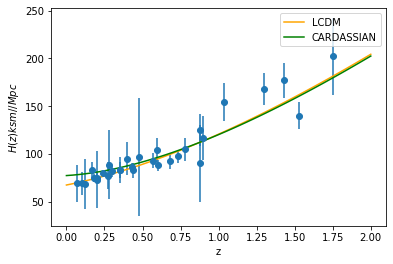

In [45]:
fig5=plt.figure()
plt.errorbar(zdat,H0dat, yerr=sigma,fmt='o')
plt.plot(zbin,HzLCDMbin, color='orange',label='LCDM')
plt.plot(zbin,HzCARbin, color='green',label='CARDASSIAN')
plt.xlabel('z')
plt.ylabel('$H(z) ksm//Mpc$')
plt.legend()
fig5.savefig("Hwithdata.pdf")

Ahora queremos ajustar los parámetros de un modelo con los datos a través de la Chi-cuadrada

\begin{equation}
\chi^{2}= \sum_{i}^{N} \left(\frac{y_{i}-y_{mod}(\Theta)}{\sigma_{i}}\right)^2
\end{equation}

donde $N$ es el número de datos y $\Theta$ es un vector que contiene $M parámetros libres$

Una prueba de un buen fiteo ('goodness-of-fit') es que $\chi^{2}\approx \nu$ donde $\nu=N-M$ es el número de grados de libertad. Se define la chi-reducida como $\chi_{red}^{2}=\chi^{2}/\nu$. Se tiene que:

\begin{equation}
\chi^{2}_{red}=
\begin{cases}
>1 & \text{ mal ajuste o errores subestimados}  \\
\approx 1 & \text{buen ajuste}\\
<1 & \text{ sobreajuste, errores sobreestimados}\\
\end{cases}
\end{equation}

In [46]:
def ChiHzmodel(p1,p2,p3):
    cosmo=CosmologiaLCDM(p1,p2,p3)
    a=0.0
    for i in range(len(zdat)):
        x=(H0dat[i] - (100*cosmo.h)*cosmo.Ezmodel(zdat[i]))/sigma[i]
        a +=pow(x,2.0)
    return a

In [49]:
ChiHzmodel(0.7,0.3,0.045)/(28)

0.8963781807356518

In [50]:
from scipy.optimize import differential_evolution

In [54]:
fun = lambda parf: ChiHzmodel(parf[0],parf[1],parf[2])  # esta línea es solo para CPL
bounds = [(0.0,1.0), (0.0,1.0),(0.01,0.1)] #esta línea es solo para CPL

result = differential_evolution(fun, bounds)
result.x, result.fun

(array([0.69694848, 0.23083124, 0.04998649]), 16.020279223897255)

In [55]:
chilcdm= ChiHzmodel(result.x[0],result.x[1],result.x[2])
print(chilcdm)

16.020279223897255


In [56]:
from scipy.optimize import minimize

In [59]:
res = minimize(fun, (0.1, 0.1,0.01), bounds=bounds)

/home/aldebaran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/aldebaran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


In [58]:
print(res)

      fun: 16.020279223897347
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([6.03961325e-06, 1.03028697e-05, 1.06581410e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 80
      nit: 13
   status: 0
  success: True
        x: array([0.69694848, 0.27081774, 0.01      ])


In [60]:
def ChiHzCARmodel(p1,p2,p3,p4):
    cosmo2=CosmologiaCardassian(p1,p2,p3,p4)
    a=0.0
    for i in range(len(zdat)):
        x=(H0dat[i] - (100*cosmo2.h)*cosmo2.Ezmodel(zdat[i]))/sigma[i]
        a +=pow(x,2.0)
    return a

In [61]:
ChiHzCARmodel(0.67,0.264,0.051, 0.2)

84.62717186700482

In [63]:
fun2 = lambda parf: ChiHzCARmodel(parf[0],parf[1],parf[2],parf[3])  # esta línea es solo para CPL
bounds2 = [(0.01,1), (0.01,1.0),(0.01,0.08), (-0.2,1)] #esta línea es solo para CPL

result2 = differential_evolution(fun2, bounds2)
result2.x

array([ 0.60873849,  0.34316409,  0.06185676, -0.2       ])

In [103]:
result2.x[0]

0.608738449906847

In [68]:
chicar=ChiHzCARmodel(result2.x[0],result2.x[1],result2.x[2],result2.x[3])
print(chicar/(31-4))

0.5716451327951838


Selección de modelos


\begin{equation}
{\rm AIC}=\chi^2+2M\;,
\end{equation}

\begin{equation}
{\rm BIC}=\chi^2+M\ln N\;
\end{equation}

Se trabaja con la diferencia entre dos o todos los modelos $\Delta {\rm AIC} \equiv 
{\rm AIC}_2-{\rm AIC}_1$ y $\Delta {\rm BIC} \equiv 
{\rm BIC}_2-{\rm BIC}_1$


Evidencia a favor del modelo
\begin{equation}
\Delta_{AIC}=
\begin{cases}
0 - 2 &	\text{ Substantial} \\
4 - 7 &	\text {Considerably less} \\
> 10 & \text {Essentially none} \\
\end{cases}
\end{equation}

Evidencia en contra del modelo
\begin{equation}
\Delta_{BIC}=
\begin{cases}
0 - 2 & \text{ Not worth more than a bare mention} \\
2 - 6 &	\text{ Positive} \\
6 - 10 & \text{ Strong} \\
> 10 & \text{ Very strong} \\
\end{cases}
\end{equation}



In [113]:
AIC_lcdm=chilcdm+2*3
AIC_car=chicar+2*4
print(AIC_lcdm,AIC_car)


22.02403190926872 23.434418585468283


In [114]:
AIC_car-AIC_lcdm

1.4103866761995612

In [119]:
BIC_lcdm=chilcdm+3*np.log(31)
BIC_car=chicar+4*np.log(31)
print(BIC_lcdm,BIC_car)

26.32599352272416 29.170367403408868


In [120]:
BIC_car-BIC_lcdm

2.8443738806847065